![texto alternativo](https://pydicom.github.io/pydicom/stable/_static/pydicom_flat_black.svg) 
#Aplicación de python para procesamiento de imágenes DICOM


Cabrera Rafael rafaelcabrera@unc.edu.ar
Rusconi Lagarrigue Ana Beatriz anarusconi.2824@gmail.com

In [1]:
!pip install -U pydicom
#pip install -U git+https://github.com/pydicom/pydicom.git
#conda install pydicom --channel conda-forge

Requirement already up-to-date: pydicom in /usr/local/lib/python3.6/dist-packages (1.3.0)


In [2]:
import pydicom
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

In [3]:
#Pydicom no es un servidor DICOM, y no es principalmente un visor de imágenes. 
# Está designado para manipular datos en archivos DICOM con lenguaje python.

from pydicom.data import get_testdata_files
filename = get_testdata_files("rtplan.dcm")[0]
ds = pydicom.dcmread(filename)  # plan dataset

print('Nombre del Paciente_' , ds.PatientName)

ds.dir("setup")   # obtiene una lista de etiquetas con "setup" en algún lugar del nombre
print(ds.PatientSetupSequence[0])
ds.PatientSetupSequence[0].PatientPosition = "HFP"
ds.save_as("rtplan2.dcm")
print(ds)


Nombre del Paciente_ Last^First^mid^pre
(0018, 5100) Patient Position                    CS: 'HFS'
(300a, 0182) Patient Setup Number                IS: "1"
(300a, 01b2) Setup Technique Description         ST: ''
(0008, 0012) Instance Creation Date              DA: '20030903'
(0008, 0013) Instance Creation Time              TM: '150031'
(0008, 0016) SOP Class UID                       UI: RT Plan Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.777.777.77.7.7777.7777.20030903150023
(0008, 0020) Study Date                          DA: '20030716'
(0008, 0030) Study Time                          TM: '153557'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'RTPLAN'
(0008, 0070) Manufacturer                        LO: 'Manufacturer name here'
(0008, 0080) Institution Name                    LO: 'Here'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 1010) Station Name                        SH: 'COMPUT

# Visualización de imágenes

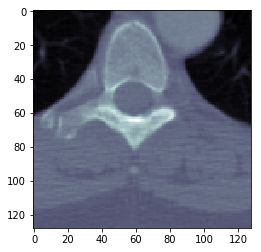

In [18]:
from pydicom.data import get_testdata_files

filename = get_testdata_files("CT_small.dcm")[0]

ds = pydicom.dcmread(filename)

plt.imshow(ds.pixel_array, cmap=plt.cm.bone)



In [4]:

from pydicom.data import get_testdata_files

filename = get_testdata_files("rtplan.dcm")[0]
ds = pydicom.dcmread(filename)

ds.PatientName

print(ds[0x10,0x10].value) 



Last^First^mid^pre


In [6]:
ds.PatientID = "12345"
ds.SeriesNumber = 5
ds[0x10,0x10].value = 'Test'
print(ds.PatientID)

12345


# Procesamiento

The image has 64 x 64 voxels


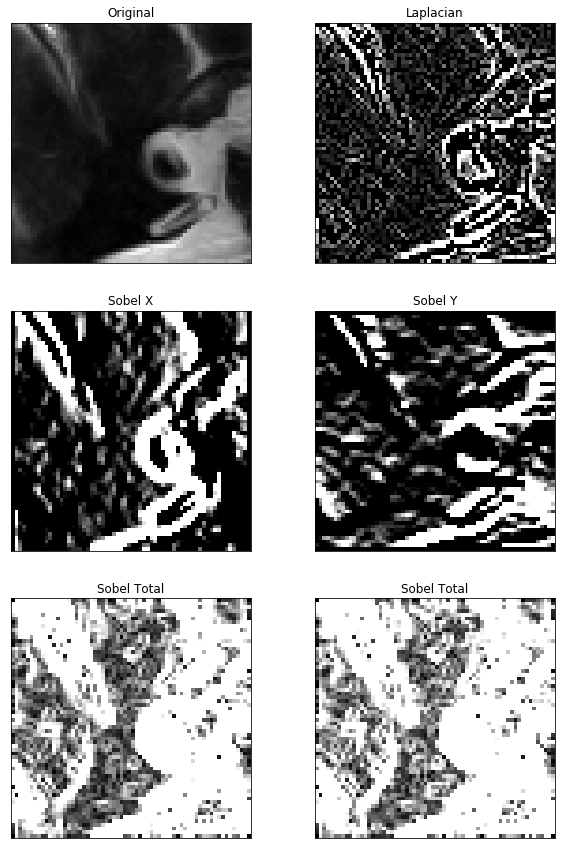

In [5]:
import pydicom
from pydicom.data import get_testdata_files

datodcm = get_testdata_files('MR_small.dcm')[0] #importa el archivo de prueba
ds = pydicom.dcmread(datodcm) #lee el archivo de prueba

data = ds.pixel_array # convertimos a un array
print('The image has {} x {} voxels'.format(data.shape[0],
                                            data.shape[1]))

img=data

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)#1 0 indica sentido x, ksize: tamaño kernel
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)#0 1 indica sentido y, ksize: tamaño kernel

laplacian = cv2.Laplacian(img,cv2.CV_64F)

fig = plt.gcf()
fig.set_size_inches(10,15)
plt.subplot(3,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,2),plt.imshow(laplacian,cmap = 'gray',vmin=0,vmax=255)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,3),plt.imshow(sobelx,cmap = 'gray',vmin=0,vmax=255)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,4),plt.imshow(sobely,cmap = 'gray',vmin=0,vmax=255)
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,5),plt.imshow(np.sqrt((sobelx*sobelx+sobely*sobely)),cmap = 'gray',vmin=0,vmax=255)
plt.title('Sobel Total'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,6),plt.imshow(abs(sobelx)+abs(sobely),cmap = 'gray',vmin=0,vmax=255)
plt.title('Sobel Total'), plt.xticks([]), plt.yticks([])
plt.show()


Tamaño de la matriz=  (128, 128)


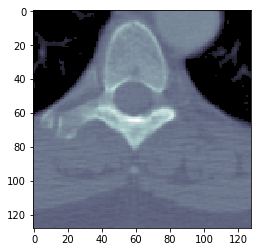

In [21]:
##Trabajando con Pixel Data
from pydicom.data import get_testdata_files
filename = get_testdata_files("CT_small.dcm")[0]
ds = pydicom.dcmread(filename) ds.PixelData 
print('Tamaño de la matriz= ', ds.pixel_array.shape)
#Para trabajar con la propiedad pixel_array, NumPy debe estar instalado en su sistema.
for n,val in enumerate(ds.pixel_array.flat): # Ejemplo: zero anything < 300
    if val < 300:
        ds.pixel_array.flat[n]=0
ds.PixelData = ds.pixel_array.tobytes()
ds.save_as("newfilename.dcm")

import os
os.remove("newfilename.dcm")
plt.imshow(ds.pixel_array,cmap=plt.cm.bone)

# Algunos cambios pueden requerir que se modifiquen otras etiquetas DICOM. 
# Por ejemplo, si los datos de píxeles se reducen 
# (por ejemplo, una imagen 512 \ times 512 se contrae a 256 \ times 256), 
# entonces ds.Rows y ds.Columns deben configurarse adecuadamente. 
# Debe establecerlos explícitamente usted mismo; Pydicom no lo hace automáticamente.



Ingrese tamaño máscara (n positivo)):10


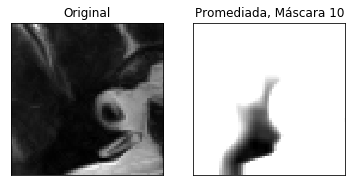

In [15]:
def mascara(x):
    return(np.ones((x,x),np.float32)/(x*x))


import cv2
import numpy as np
from matplotlib import pyplot as plt

img = data
n=int(input("Ingrese tamaño máscara (n positivo)):"))
kernel=mascara(n)

dst = cv2.filter2D(data,0,kernel)

plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst,cmap='gray'),plt.title('Promediada, Máscara %d' %(n))
plt.xticks([]), plt.yticks([])
plt.show()



---


# Ejemplos





###Reduzca la imagen MRI utilizando pydicom




In [10]:
import pydicom
from pydicom.data import get_testdata_files

filename = get_testdata_files('MR_small.dcm')[0]
ds = pydicom.dcmread(filename)

data = ds.pixel_array # convertimos a un array
print('The image has {} x {} voxels'.format(data.shape[0],
                                            data.shape[1]))
data_downsampling = data[::8, ::8]
print('The downsampled image has {} x {} voxels'.format(
    data_downsampling.shape[0], data_downsampling.shape[1]))

# copia los datos nuevamente al conjunto de datos original
ds.PixelData = data_downsampling.tobytes()
# actualiza la información sobre la forma de la matriz de datos
ds.Rows, ds.Columns = data_downsampling.shape

# print the image information given in the dataset
print('The information of the data set after downsampling: \n')
print(ds)

The image has 64 x 64 voxels
The downsampled image has 8 x 8 voxels
The information of the data set after downsampling: 

(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'OTHER']
(0008, 0012) Instance Creation Date              DA: '20040826'
(0008, 0013) Instance Creation Time              TM: '185434'
(0008, 0014) Instance Creator UID                UI: 1.3.6.1.4.1.5962.3
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.5962.1.1.4.1.1.20040826185059.5457
(0008, 0020) Study Date                          DA: '20040826'
(0008, 0021) Series Date                         DA: ''
(0008, 0022) Acquisition Date                    DA: ''
(0008, 0030) Study Time                          TM: '185059'
(0008, 0031) Series Time                         TM: ''
(0008, 0032) Acquisition Time                    TM: ''
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Moda

## python – Crea un archivo pydicom desde una matriz numpy
https://codeday.me/es/qa/20191015/1503833.html
https://github.com/zivy/SimpleITK/blob/8e94451e4c0e90bcc6a1ffdd7bc3d56c81f58d80/Examples/DicomSeriesReadModifyWrite/DicomSeriesReadModifySeriesWrite.py

## Complementar con:
1- https://medium.com/@taposhdr/medical-image-analysis-with-deep-learning-i-23d518abf531

2- https://medium.com/@taposhdr/medical-image-analysis-with-deep-learning-ii-166532e964e6?source=---------12------------------

3-https://medium.com/@taposhdr/medical-image-analysis-with-deep-learning-iii-eb01cc219aa2?source=---------11------------------

4-https://medium.com/@taposhdr/medical-image-analysis-with-deep-learning-iv-479b5fa446e7?source=---------10------------------

####Anonimizar DICOM
https://pydicom.github.io/pydicom/stable/auto_examples/metadata_processing/plot_anonymize.html#sphx-glr-auto-examples-metadata-processing-plot-anonymize-py

# Cargar cortes CT y grafique imágenes axiales, sagitales y coronales

In [6]:
#reparar, codigo de pydicom del tutorial oficial
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import sys
import glob

# load the DICOM files
filename = get_testdata_files('MR_small.dcm')[0]
files = pydicom.dcmread(filename)
print('glob: {}'.format(sys.argv[1]))
for fname in glob.glob(sys.argv[1], recursive=False):
    print("loading: {}".format(fname))
    files.append(pydicom.read_file(fname))

print("file count: {}".format(len(files)))


slices = []
skipcount = 0
for f in files:
    if hasattr(f, 'SliceLocation'):
        slices.append(f)
    else:
        skipcount = skipcount + 1

print("skipped, no SliceLocation: {}".format(skipcount))

# ensure they are in the correct order
slices = sorted(slices, key=lambda s: s.SliceLocation)

# pixel aspects, assuming all slices are the same
for i in range(128):  
  ps = slices[i].PixelSpacing
ss = slices[0].SliceThickness
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]

# create 3D array
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d = np.zeros(img_shape)

# fill 3D array with the images from the files
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:, :, i] = img2d

# plot 3 orthogonal slices
a1 = plt.subplot(2, 2, 1)
plt.imshow(img3d[:, :, img_shape[2]//2])
a1.set_aspect(ax_aspect)

a2 = plt.subplot(2, 2, 2)
plt.imshow(img3d[:, img_shape[1]//2, :])
a2.set_aspect(sag_aspect)

a3 = plt.subplot(2, 2, 3)
plt.imshow(img3d[img_shape[0]//2, :, :].T)
a3.set_aspect(cor_aspect)

plt.show()

glob: -f
file count: 73
skipped, no SliceLocation: 73


IndexError: list index out of range